In [9]:
# helpers
from napari_ndev import helpers
import pathlib
import numpy as np
import pandas as pd
from pprint import pprint

# image loading and saving
from bioio import BioImage
import bioio_ome_tiff
from bioio.writers import OmeTiffWriter

# image processing
import apoc
import pyclesperanto_prototype as cle

# image analysis
from skimage import measure

# image viewing
import napari
import stackview
import matplotlib.pyplot as plt

In [27]:
# create a class that can be used to view a set of images
# this is given a list of dictionaries, each of which contains a set of images
# for each image set, there should be a new row, and each image should be a new column

class ImageOverview:
    def __init__(self, image_sets):
        self.image_sets = image_sets
        self.fig, self.axs = self._construct_overview()
        
    def _construct_overview(self):
        num_rows = len(self.image_sets)
        num_columns = max(
            [len(image_set['images']) for image_set in self.image_sets]
        )
        
        fig, axs = plt.subplots(
            num_rows, 
            num_columns,
            figsize=(num_columns * 5, num_rows * 5)
        )
        
        if num_rows == 1:
            axs = [axs]
        if num_columns == 1:
            axs = [[ax] for ax in axs]
            
        # iterate through the image sets
        for row, image_set in enumerate(self.image_sets):
            images = image_set['images']
            colormaps = image_set.get('colormaps', ['gray'] * len(images)) # default to gray for each image if no colormap
            titles = image_set.get('titles', [''] * len(images))
            
            for col, image in enumerate(images):
                stackview.imshow(
                    image, 
                    title=titles[col],
                    colormap=colormaps[col],
                    plot=axs[row][col],
                )

        plt.subplots_adjust(wspace=0.1, hspace=0.1)
        # plt.tight_layout()
        return fig, axs
    
    def show(self):
        plt.show()
    
    # def save(self, filepath):
    #     self.fig.savefig(filepath)

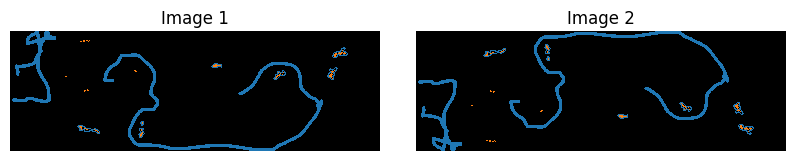

In [29]:
img = BioImage(
    r'C:\Users\timmo\Documents\Github\napari-ndev\src\napari_ndev\_tests\resources\Apoc\Images\SPF-4MM-22 slide 9-S6_Top Slide_TR2_p00_0_A01f00d0.tiff'
)
# stackview.imshow(np.squeeze(img.data))
image_data = np.squeeze(img.data)
reversed_data = np.flip(image_data, axis=0)

image_set1 = {
    'images': [image_data, reversed_data],
    'colormaps': ['red', 'green'],
    'titles': ['Image 1', 'Image 2']
}

overview = ImageOverview([image_set1])
overview.show()
overview

In [ ]:
import matplotlib.pyplot as plt
from skimage import io

class ImageSet:
    def __init__(self, image_sets):
        self.image_sets = image_sets
        self.fig, self.axs = self._construct_subplot()
    
    def _construct_subplot(self):
        num_rows = len(self.image_sets)
        num_columns = max(len(image_set['images']) for image_set in self.image_sets)
        
        fig, axs = plt.subplots(num_rows, num_columns, figsize=(5 * num_columns, 5 * num_rows))
        
        if num_rows == 1:
            axs = [axs]
        if num_columns == 1:
            axs = [[ax] for ax in axs]
        
        for row, image_set in enumerate(self.image_sets):
            images = image_set['images']
            colormaps = image_set.get('colormaps', ['gray'] * len(images))
            titles = image_set.get('titles', [''] * len(images))
            
            for col, image in enumerate(images):
                ax = axs[row][col]
                ax.imshow(image, cmap=colormaps[col])
                ax.set_title(titles[col])
                ax.axis('off')
        
        plt.tight_layout()
        return fig, axs

    def display(self):
        # Display the constructed subplot
        plt.show()

    def save(self, filepath):
        # Save the constructed subplot to a file
        # Note: This saves the entire figure as a single image
        self.fig.savefig(filepath)
        print(f"Saved figure to {filepath}")

# Example usage:
# image_sets = [
#     {'images': [img1, img2], 'colormaps': ['gray', 'viridis'], 'titles': ['First', 'Second']},
#     {'images': [img3], 'titles': ['Third']}
# ]
# img_set = ImageSet(image_sets)
# img_set.display()
# img_set.save('path/to/save/overview.png')